# NAME: Godfrey maina
# Course:BSD
# UNIT:Machine Learning
# Project:Salary prediction     

## importing libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

i  matplotlib and seaborn are data visualization library

ii numpy and pandas are data munipulation libary

### read Data from /csv file

In [4]:
sal_data = pd.read_csv('data.csv')
sal_data.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [5]:
sal_data.columns

Index(['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience',
       'Salary'],
      dtype='object')

### checking for duplicates in the data

In [6]:
sal_data[sal_data.duplicated()]

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
195,28.0,Male,Bachelor's,Junior Business Analyst,2.0,40000.0
250,30.0,Female,Bachelor's,Junior Marketing Coordinator,2.0,40000.0
251,38.0,Male,Master's,Senior IT Consultant,9.0,110000.0
252,45.0,Female,PhD,Senior Product Designer,15.0,150000.0
253,28.0,Male,Bachelor's,Junior Business Development Associate,2.0,40000.0
254,35.0,Female,Bachelor's,Senior Marketing Analyst,8.0,85000.0
255,44.0,Male,Bachelor's,Senior Software Engineer,14.0,130000.0
256,34.0,Female,Master's,Senior Financial Advisor,6.0,100000.0
257,35.0,Male,Bachelor's,Senior Project Coordinator,9.0,95000.0
258,50.0,Female,PhD,Director of Operations,22.0,180000.0


In [7]:
sal_data[sal_data.duplicated()].shape

(50, 6)

### dropping duplicates from the data

In [8]:
new_sal_data = sal_data.drop_duplicates(keep = 'first')

In [9]:
new_sal_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 325 entries, 0 to 371
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  324 non-null    float64
 1   Gender               324 non-null    object 
 2   Education Level      324 non-null    object 
 3   Job Title            324 non-null    object 
 4   Years of Experience  324 non-null    float64
 5   Salary               324 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.8+ KB


###  checking for missing/null values

In [10]:
new_sal_data.isnull().sum()

Age                    1
Gender                 1
Education Level        1
Job Title              1
Years of Experience    1
Salary                 1
dtype: int64

###  dropping missing/null values

In [11]:
new_sal_data.dropna(inplace = True);

C:\Users\Godie\AppData\Local\Temp\ipykernel_17856\3312631672.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_sal_data.dropna(inplace = True);


In [12]:
new_sal_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 324 entries, 0 to 371
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  324 non-null    float64
 1   Gender               324 non-null    object 
 2   Education Level      324 non-null    object 
 3   Job Title            324 non-null    object 
 4   Years of Experience  324 non-null    float64
 5   Salary               324 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


### Data exploration

### correlation matrix among numerical feature

In [13]:
corr = new_sal_data[['Age','Years of Experience','Salary']].corr()

In [14]:
corr

,Age,Years of Experience,Salary
Age,1.000000,0.979192,0.916543
Years of Experience,0.979192,1.000000,0.924455
Salary,0.916543,0.924455,1.000000


<Axes: >

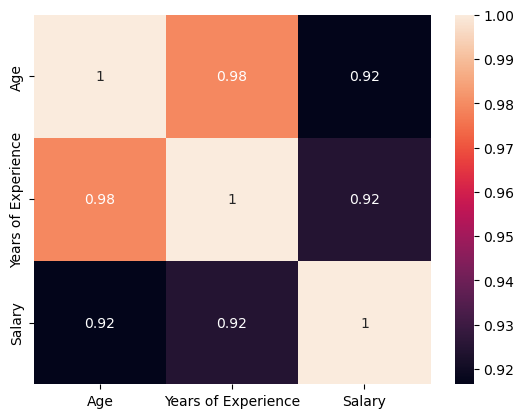

In [15]:
sns.heatmap(corr,annot = True)

### Feature engineering

In [16]:
from sklearn.preprocessing import LabelEncoder
Label_Encoder = LabelEncoder()

In [36]:
new_sal_data.loc[:,'Gender_Encode'] = Label_Encoder.fit_transform(new_sal_data['Gender'])

In [37]:
new_sal_data.loc[:,'Education Level_Encode'] = Label_Encoder.fit_transform(new_sal_data['Education Level'])

In [38]:
new_sal_data.loc[:,'Job Title_Encode'] = Label_Encoder.fit_transform(new_sal_data['Job Title'])

In [18]:
new_sal_data.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Gender_Encode,Education Level_Encode,Job Title_Encode
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,1,0,159
1,28.0,Female,Master's,Data Analyst,3.0,65000.0,0,1,17
2,45.0,Male,PhD,Senior Manager,15.0,150000.0,1,2,130
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,0,0,101
4,52.0,Male,Master's,Director,20.0,200000.0,1,1,22


## feautere scaling

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [40]:
new_sal_data.loc[:,'Age_scaled'] = scaler.fit_transform(new_sal_data[['Age']])


In [41]:
new_sal_data.loc[:,'Years of Experience_scaled'] = scaler.fit_transform(new_sal_data[['Years of Experience']])

## data after scaling

In [22]:
new_sal_data.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Gender_Encode,Education Level_Encode,Job Title_Encode,Age_scaled,Years of Experience_scaled
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,1,0,159,-0.750231,-0.761821
1,28.0,Female,Master's,Data Analyst,3.0,65000.0,0,1,17,-1.307742,-1.063017
2,45.0,Male,PhD,Senior Manager,15.0,150000.0,1,2,130,1.061680,0.744158
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,0,0,101,-0.192720,-0.460625
4,52.0,Male,Master's,Director,20.0,200000.0,1,1,22,2.037324,1.497148


In [23]:
Y =new_sal_data['Salary']
X =new_sal_data.drop(columns=['Salary','Age','Years of Experience','Job Title','Education Level','Gender'])

In [24]:
Y

0       90000.0
1       65000.0
2      150000.0
3       60000.0
4      200000.0
         ...   
348     35000.0
349    110000.0
350    160000.0
351     55000.0
371    170000.0
Name: Salary, Length: 324, dtype: float64

In [25]:
X

,Gender_Encode,Education Level_Encode,Job Title_Encode,Age_scaled,Years of Experience_scaled
0,1,0,159,-0.750231,-0.761821
1,0,1,17,-1.307742,-1.063017
2,1,2,130,1.061680,0.744158
3,0,0,101,-0.192720,-0.460625
4,1,1,22,2.037324,1.497148
...,...,...,...,...,...
348,0,0,68,-1.307742,-1.364212
349,1,0,111,-0.192720,-0.310027
350,0,2,115,0.922302,0.894756
351,1,0,63,-0.889609,-1.063017


### splitting adat into training and testing

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2)

## model development

In [28]:
from sklearn.linear_model import LinearRegression

In [29]:
reg = LinearRegression()

### model training

In [30]:
reg.fit(x_train,y_train)

LinearRegression()

## model prediction

In [31]:
y_predict = reg.predict(x_test)

In [32]:
df = pd.DataFrame({'Y_Actual':y_test,'Y_Predicted':y_predict})

In [33]:
df

,Y_Actual,Y_Predicted
242,120000.0,90069.209123
111,95000.0,94114.871978
321,65000.0,63756.359108
348,35000.0,35848.425650
179,170000.0,157794.000753
...,...,...
265,40000.0,40423.999847
67,45000.0,51996.007511
268,60000.0,67544.862899
207,120000.0,93410.249146


### model Accuracy

In [34]:
from sklearn.metrics import accuracy_score,r2_score

In [35]:
r2_score(y_test,y_predict)

0.9014233346025727

from the above information the model have 90.14% accuracy and we can say that the model was able to lern and generalize the data well